In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

C:\Users\Shuba\AppData\Local\Temp\ipykernel_6568\2108122044.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\Shuba\Downloads\iris_prac.csv")

In [3]:
df

,Sepal_length,Sepal_Width,Petal_length,Petal_Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.Target.value_counts()

Target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
X=df.drop("Target",axis=1)

In [8]:
X

,Sepal_length,Sepal_Width,Petal_length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y=df["Target"]

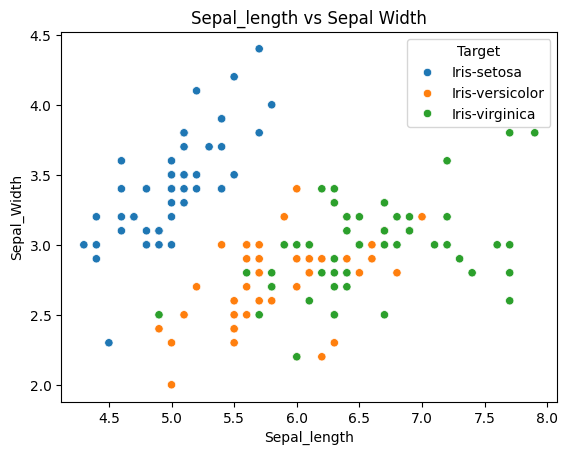

In [10]:
sns.scatterplot(df,x="Sepal_length",y="Sepal_Width",hue="Target")
plt.title("Sepal_length vs Sepal Width")
plt.show()

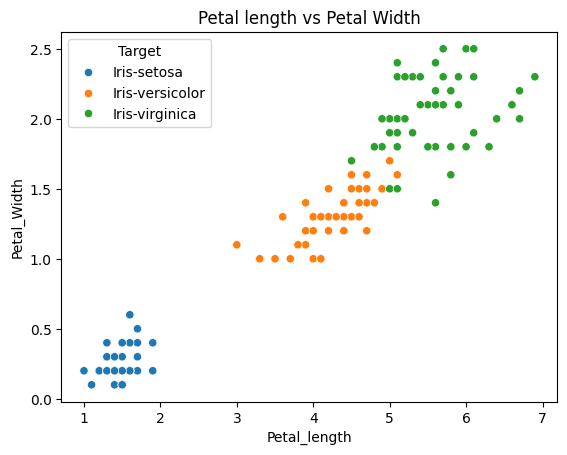

In [11]:
sns.scatterplot(df,x="Petal_length",y="Petal_Width",hue="Target")
plt.title("Petal length vs Petal Width")
plt.show()

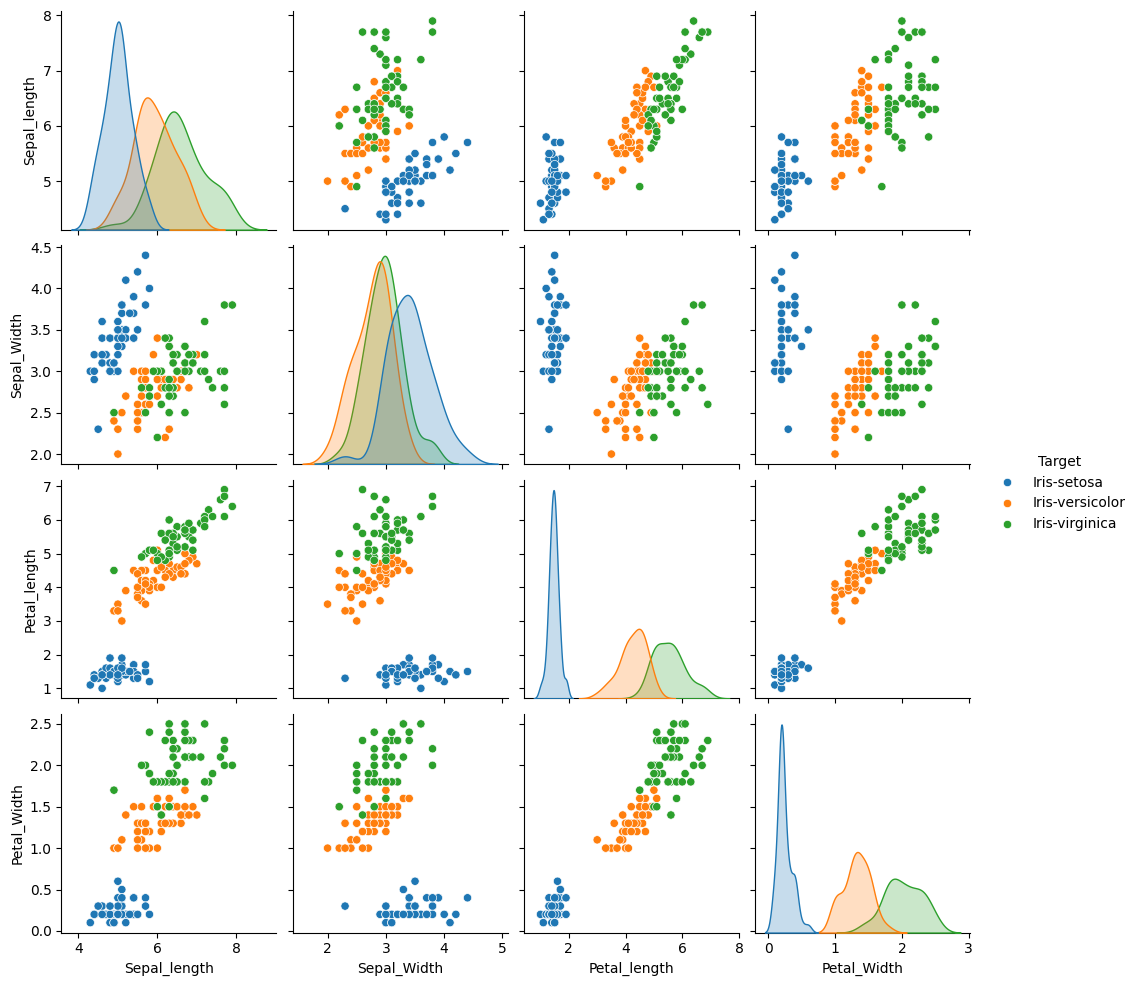

In [12]:
sns.pairplot(df,hue="Target")

In [13]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.75,random_state=45)

In [14]:
model=LogisticRegression()

In [15]:
model.fit(X_tr,y_tr)

LogisticRegression()

In [16]:
model.score(X_tr,y_tr)

0.9642857142857143

In [17]:
y_pred=model.predict(X_te)

In [18]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [19]:
accuracy_score(y_te,y_pred)

0.9473684210526315

In [20]:
confusion_matrix(y_te,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)

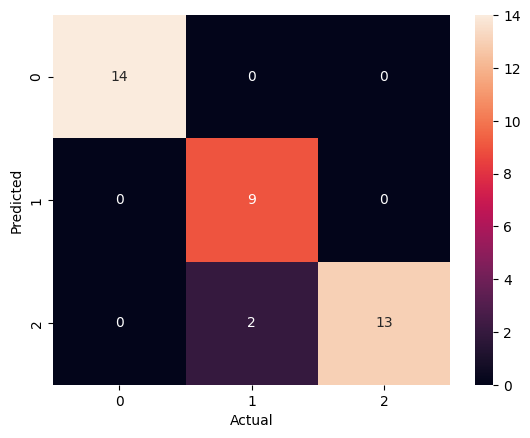

In [21]:
sns.heatmap(confusion_matrix(y_te,y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

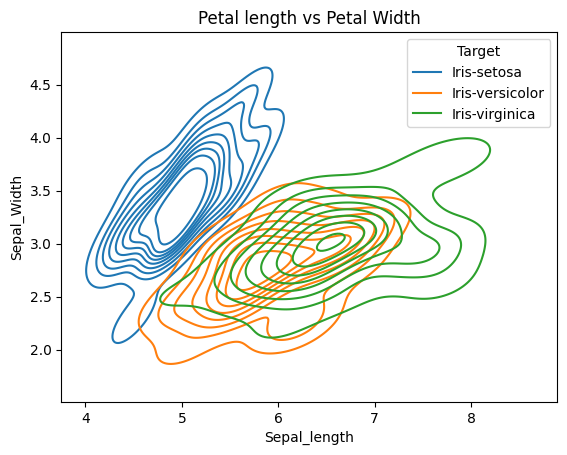

In [24]:
sns.kdeplot(df,x="Sepal_length",y="Sepal_Width",hue="Target")
plt.title("Petal length vs Petal Width")
plt.show()

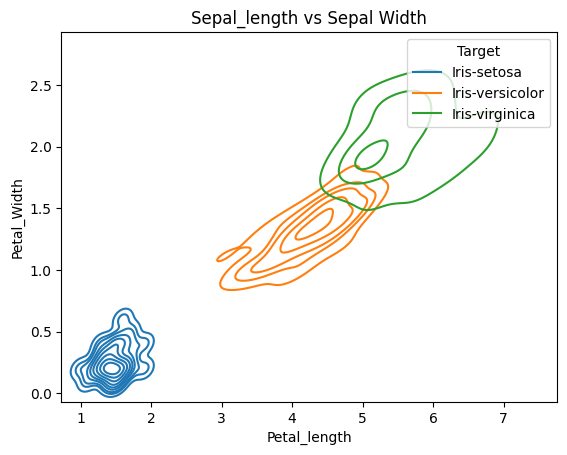

In [23]:
sns.kdeplot(df,x="Petal_length",y="Petal_Width",hue="Target")
plt.title("Sepal_length vs Sepal Width")
plt.show()


In [25]:
print(classification_report(y_te,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.94      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38



In [26]:
model.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [27]:
model.predict([[5.9,3.0,5.1,1.8]])

array(['Iris-virginica'], dtype=object)

In [28]:
model.predict_proba([[5.9,3.0,5.1,1.8]])

array([[0.0008147, 0.2839906, 0.7151947]])

In [29]:
np.round(model.predict_proba([[5.1,3.5,1.4,0.2]]),6)

array([[0.977753, 0.022247, 0.      ]])